## Quadrupole Approximation

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.constants import G,c,pi

In [2]:
M_o = 1.358*(10**30)

Here we defined all the eqns with the event actually happening at t = 0, but from the given time series data, the event happened at t = 32.4 secs from the start of recording.

Why we are not taking that because our waveform model equation only explains/works till the inspiral phase, which we take to be at t = 0 for our waveform model, hence we chose our equation according to that.

In [3]:
def freq(t):
    return (5**(3/8)/(8*pi))*(G*35*M_o/c**3)**(-5/8)*((-t)**(-3/8))

def h(t):
    return (4*G*35*M_o/((c**2)*1.2651*10**25))*(G*pi*35*M_o*freq(t)/c**3)**(2/3)

def fdot(t):
    return (5**(3/8)/(8*pi))*(G*35*M_o/c**3)**(3/8)*(3/8)*((-t)*(-t)**(-3/8))
    #return (35*M_o*G/c**3)*(96/5)*(pi**(8/3))*(freq(t)**(11/3))
def phase(t):
    return 2*pi*((freq(t)*t)+(0.5*fdot(t)*t**2))

def ampl(t):
    return h(t)*np.cos(phase(t))

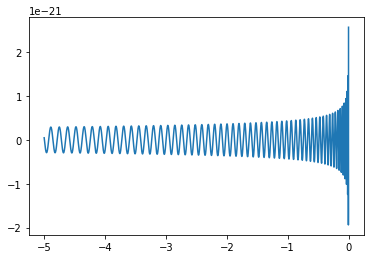

In [4]:
dt = 1/4000
t_arr = np.arange(-5,0,dt)
wave_str = ampl(t_arr);
plt.plot(t_arr,wave_str);

In [5]:
strain_data = np.loadtxt('data/GW150914_filtered.txt')
n = len(strain_data)

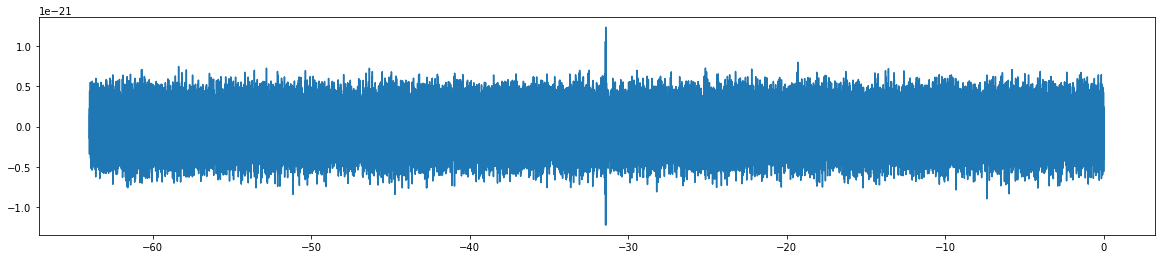

In [6]:
plt.figure(figsize=(20,4))
plt.plot(np.linspace(-64,0,n),strain_data);

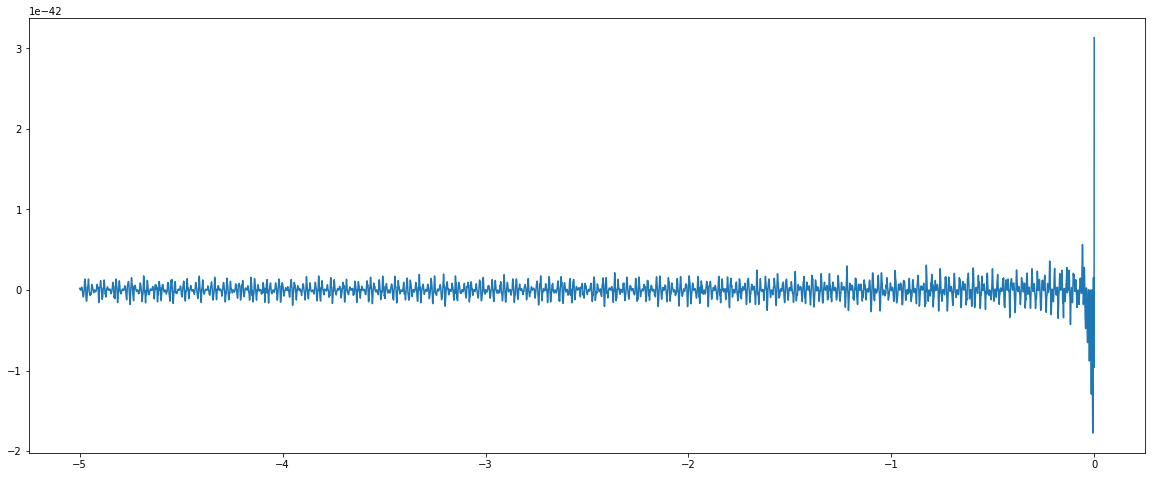

In [7]:
arr = []
interv = 20000
for i in range(interv):
    arr.append(strain_data[95909-interv+i]*wave_str[i])
plt.figure(figsize=(20,8))
plt.plot(t_arr,arr);

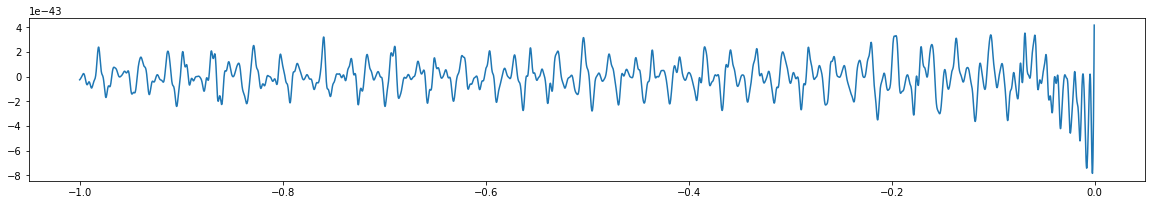

In [8]:
plt.figure(figsize=(20,3))
t1 = np.where(t_arr<=0)[0]
t2 = np.where(t_arr>-1)[0]
t_ind = np.intersect1d(t1,t2)
sliced_strain = wave_str[t_ind[0]:t_ind[-1]]
plt.plot(t_arr[t_ind[0]:t_ind[-1]],strain_data[t_ind[0]:t_ind[-1]] * wave_str[t_ind[0]:t_ind[-1]]);

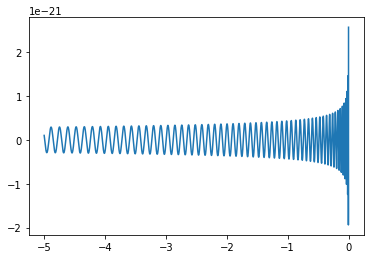

In [9]:
from numpy import diff
t = np.arange(-5,0,dt)
f = (5**(3/8)/(8*pi))*(G*35*M_o/c**3)**(-5/8)*((-1*t)**(-3/8))
df = diff(f)
df = np.append(df,0.000000001)
h_t = (4*G*35*M_o/((c**2)*1.2651*10**25))*(G*pi*35*M_o*f/c**3)**(2/3)
wave = h_t * np.cos(2*pi*f*t+(df*(t*t)))
plt.plot(t,wave);

## PN Approximation

In [10]:
#arbitrary frequency
fst = 10

#other constants
m1 = 15*M_o
m2 = 20*M_o
mu = m1*m2/(m1+m2)
m = m1+m2
nu = mu/m
M = G*m/c**3

#parameters
tau0 = (5/(256*pi))*(fst*(pi*M*fst)**(5/3)*nu)**(-1)
tau1 = (5/(192*pi))*(fst*(pi*M*fst)*nu)**(-1)*(743/336+(11*nu/4))
tau1o5 = (1/8)*(fst*(pi*M*fst)**(2/3)*nu)**(-1)
tau2 = (5/(128*pi))*(fst*(pi*M*fst)**(1/3)*nu)**(-1)*(3058673/1016064+(5429*nu/1008)+(617*(nu**2)/144))

In [11]:
def dfdt(t,f):
    return ((3*fst/(8*tau0))*(f/fst)**(11/3))*(1-((3*tau1/(4*tau0))*(f/fst)**(2/3))+((5*tau1o5/(8*tau0))*(f/fst))-0.5*(tau2/tau0-(9/8*(tau1/tau0)**2))*(f/fst)**(4/3))
from scipy.integrate import odeint
sol = odeint(dfdt,y0=fst,t=np.arange(-16,8,dt),tfirst=True)

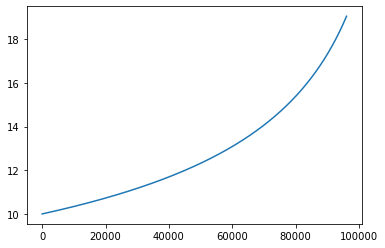

In [12]:
plt.plot(sol.T[0])

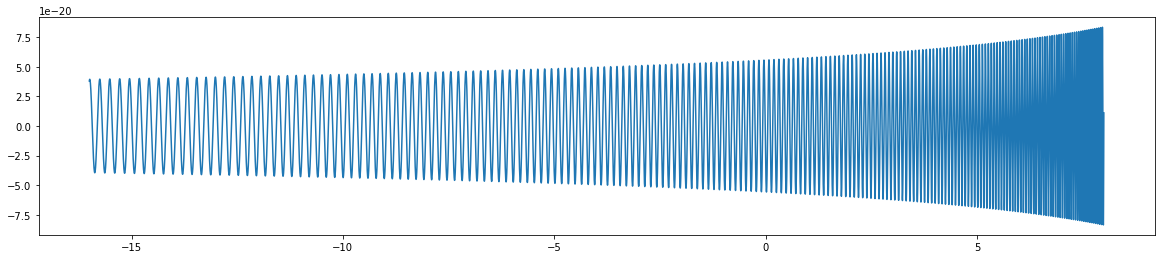

In [13]:
t = np.arange(-16,8,dt)
f = sol.T[0]
df_dt = dfdt(t,f)
phase_f = (2*pi*f*t)-(pi/4)+(2*pi*fst*((3*tau0/5*(f/fst)**(-5/3))+tau1*(fst/f)-(1.5*tau1o5*(f/fst)**(-2/3))+3*tau2*(f/fst)**(-1/3)))
h_f = (5/6)**(1/2)*(c/(2*pi**(2/3)*1.2651*10**25))*M**(5/6)*np.power(f,7/6)
wave = h_f * np.cos(phase_f)
plt.figure(figsize=(20,4))
plt.plot(t,wave);

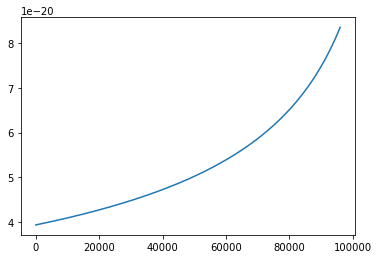

In [14]:
plt.plot(h_f)

## 30 M0 and 5 M0

In [15]:
#arbitrary frequency
fst = 20

#other constants
m1 = 26.4*M_o
m2 = 16.4*M_o
mu = m1*m2/(m1+m2)
m = m1+m2
nu = mu/m
M = G*m/c**3

#parameters
tau0 = (5/(256*pi))*(fst*(pi*M*fst)**(5/3)*nu)**(-1)
tau1 = (5/(192*pi))*(fst*(pi*M*fst)*nu)**(-1)*(743/336+(11*nu/4))
tau1o5 = (1/8)*(fst*(pi*M*fst)**(2/3)*nu)**(-1)
tau2 = (5/(128*pi))*(fst*(pi*M*fst)**(1/3)*nu)**(-1)*(3058673/1016064+(5429*nu/1008)+(617*(nu**2)/144))

In [16]:
def dfdt(t,f):
    return ((3*fst/(8*tau0))*(f/fst)**(11/3))*(1-((3*tau1/(4*tau0))*(f/fst)**(2/3))+((5*tau1o5/(8*tau0))*(f/fst))-0.5*(tau2/tau0-(9/8*(tau1/tau0)**2))*(f/fst)**(4/3))
from scipy.integrate import odeint
sol = odeint(dfdt,y0=fst,t=np.arange(-2,0,dt),tfirst=True)

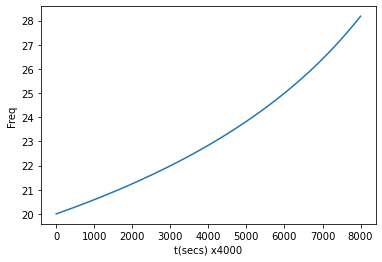

In [17]:
plt.plot(sol.T[0])
plt.xlabel("t(secs) x4000")
plt.ylabel("Freq");

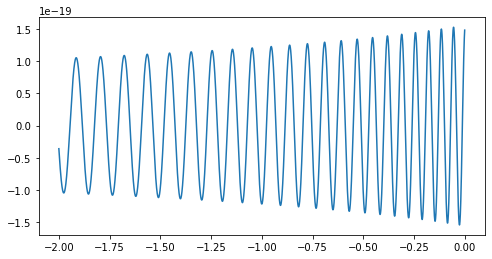

In [18]:
t = np.arange(-2,0,dt)
f = sol.T[0]
df_dt = dfdt(t,f)
phase_f = (2*pi*f*t)-(pi/4)+(2*pi*fst*((3*tau0/5*(f/fst)**(-5/3))+tau1*(fst/f)-(1.5*tau1o5*(f/fst)**(-2/3))+3*tau2*(f/fst)**(-1/3)))
h_f = (5/6)**(1/2)*(c/(2*pi**(2/3)*1.2651*10**25))*M**(5/6)*np.power(f,7/6)
h_t = (4*G*35*M_o/((c**2)*1.2651*10**25))*(G*pi*35*M_o*f/c**3)**(2/3)
wave = h_f * np.cos(phase_f)
plt.figure(figsize=(8,4))
plt.plot(t,wave);
#plt.plot(t,wave_str)

## 17M0 and 17M0

In [19]:
#arbitrary frequency
fst = 20

#other constants
m1 = 17*M_o
m2 = 27*M_o
mu = m1*m2/(m1+m2)
m = m1+m2
nu = mu/m
M = G*m/c**3

#parameters
tau0 = (5/(256*pi))*(fst*(pi*M*fst)**(5/3)*nu)**(-1)
tau1 = (5/(192*pi))*(fst*(pi*M*fst)*nu)**(-1)*(743/336+(11*nu/4))
tau1o5 = (1/8)*(fst*(pi*M*fst)**(2/3)*nu)**(-1)
tau2 = (5/(128*pi))*(fst*(pi*M*fst)**(1/3)*nu)**(-1)*(3058673/1016064+(5429*nu/1008)+(617*(nu**2)/144))

In [20]:
def dfdt(t,f):
    return ((3*fst/(8*tau0))*(f/fst)**(11/3))*(1-((3*tau1/(4*tau0))*(f/fst)**(2/3))+((5*tau1o5/(8*tau0))*(f/fst))-0.5*(tau2/tau0-(9/8*(tau1/tau0)**2))*(f/fst)**(4/3))
from scipy.integrate import odeint
sol = odeint(dfdt,y0=fst,t=np.arange(-4,0,dt),tfirst=True)

/home/korosensei/anaconda3/lib/python3.9/site-packages/scipy/integrate/odepack.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


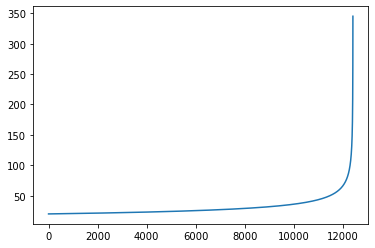

In [21]:
plt.plot(sol.T[0][:12402])

/tmp/ipykernel_242/1921418989.py:2: RuntimeWarning: invalid value encountered in power
  return ((3*fst/(8*tau0))*(f/fst)**(11/3))*(1-((3*tau1/(4*tau0))*(f/fst)**(2/3))+((5*tau1o5/(8*tau0))*(f/fst))-0.5*(tau2/tau0-(9/8*(tau1/tau0)**2))*(f/fst)**(4/3))
/tmp/ipykernel_242/3739091569.py:4: RuntimeWarning: overflow encountered in power
  phase_f = (2*pi*f*t)-(pi/4)+(2*pi*fst*((3*tau0/5*(f/fst)**(-5/3))+tau1*(fst/f)-(1.5*tau1o5*(f/fst)**(-2/3))+3*tau2*(f/fst)**(-1/3)))
/tmp/ipykernel_242/3739091569.py:4: RuntimeWarning: invalid value encountered in power
  phase_f = (2*pi*f*t)-(pi/4)+(2*pi*fst*((3*tau0/5*(f/fst)**(-5/3))+tau1*(fst/f)-(1.5*tau1o5*(f/fst)**(-2/3))+3*tau2*(f/fst)**(-1/3)))
/tmp/ipykernel_242/3739091569.py:4: RuntimeWarning: overflow encountered in true_divide
  phase_f = (2*pi*f*t)-(pi/4)+(2*pi*fst*((3*tau0/5*(f/fst)**(-5/3))+tau1*(fst/f)-(1.5*tau1o5*(f/fst)**(-2/3))+3*tau2*(f/fst)**(-1/3)))
/tmp/ipykernel_242/3739091569.py:5: RuntimeWarning: invalid value encountered in power

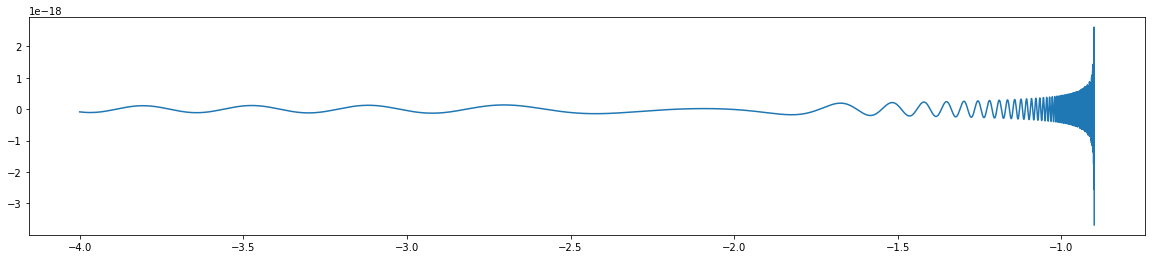

In [22]:
t = np.arange(-4,0,dt)
f = sol.T[0]
df_dt = dfdt(t,f)
phase_f = (2*pi*f*t)-(pi/4)+(2*pi*fst*((3*tau0/5*(f/fst)**(-5/3))+tau1*(fst/f)-(1.5*tau1o5*(f/fst)**(-2/3))+3*tau2*(f/fst)**(-1/3)))
h_f = (5/6)**(1/2)*(c/(2*pi**(2/3)*1.2651*10**25))*M**(5/6)*np.power(f,7/6)
wave = h_f * np.cos(phase_f)
plt.figure(figsize=(20,4))
x=12403
plt.plot(t[:x],wave[:x]);